# Data PreProcessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing packagesimport pandas as pd
import pandas as pd
import csv
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
##Loading csv files
path = r'/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/all_IMUsamples_8people.csv'

df= pd.read_csv(path, skiprows=1, usecols=[0,1,2,3,4,5,6,7], names=['Trial_number','x1', 'y1', 'z1','x2', 'y2', 'z2','label'])
print (df.info)
print(df.shape)

#label outputs (y) Activities
y = pd.read_csv(path, usecols= [7])
print("y = \n",y)
print(y.shape)

#Standarizing
x = []
scaler = StandardScaler()
x = scaler.fit_transform(df)
x = pd.DataFrame(data = df, columns = ['x1','y1','z1','x2','y2','z2'])
print("x = \n",x)
print(x.shape)

#Verifying data shape
x.shape, y.shape   

#Counting number of samples per activity
y['label'].value_counts()

<bound method DataFrame.info of         Trial_number     x1     y1     z1     x2     y2     z2  label
0                  1  0.542 -1.177 -0.796 -2.141  2.420 -1.393      0
1                  1  0.536 -1.231 -0.780 -2.466 -0.073 -1.819      0
2                  1  0.516 -1.246 -0.779 -0.516 -2.029 -0.664      0
3                  1  0.499 -1.239 -0.787  0.035 -0.993 -1.221      0
4                  1  0.475 -1.207 -0.797 -1.330 -0.199 -2.408      0
...              ...    ...    ...    ...    ...    ...    ...    ...
281156            16  0.110 -0.015  0.077 -0.072  0.073 -0.031      2
281157            16  0.090  0.016  0.076 -0.072  0.073 -0.031      2
281158            16  0.074  0.052  0.079 -0.072  0.073 -0.031      2
281159            16  0.095  0.108  0.085 -0.072  0.073 -0.031      2
281160            16  0.143  0.170  0.092 -0.072  0.073 -0.031      2

[281161 rows x 8 columns]>
(281161, 8)
y = 
         label
0           0
1           0
2           0
3           0
4           

1    97200
0    92221
2    91740
Name: label, dtype: int64

## Create train and test subdatasets

In [ ]:
import tensorflow as tf
### Convert labels from [1,2,3] to [0,1,2]  Do it just in case the values starts in 1.
### y = y - 1
### print(y)


        label
0           0
1           0
2           0
3           0
4           0
...       ...
380264      2
380265      2
380266      2
380267      2
380268      2

[380269 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(224928, 6) (56233, 6)
(224928, 1) (56233, 1)


## Graphics

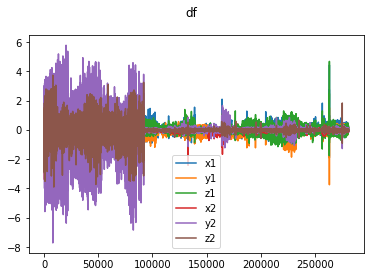

Loaded 281161 subjects


In [ ]:
name = 'df'
columns_names = ['x1','y1','z1','x2','y2','z2']
#plt.plot(df[name])
plt.plot(x)
plt.suptitle(name)
plt.legend(columns_names)
plt.show()

# plot the x, y, z acceleration and activities for multiple subjects
def plot_subject(subject):
	plt.figure()
	# create a plot for each column
	for col in range(subject.shape[0]):
		plt.subplot(subject.shape[0], 1, col+1)
		plt.plot(subject[:,col])
	plt.show()

# load
subjects = df
print('Loaded %d subjects' % len(subjects))


#Sliding Window Proccessing

In [ ]:
print(df.head())
print(df.shape)
#df.loc[3,"y2"]
#df.loc[2:4]
#print(df.loc[2:4])

dataset_size = df.shape[0] ### how many rows
window_size = 100 ### how many time steps we want to process simultaneously

xx = np.array([ x.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(xx[0:5]).loc
print("shape(xx) = ", xx.shape)

yy = np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
print("shape(yy) = ", yy.shape)

#yy = np.array([ y.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(yy[0:5])
#print("shape(yy) = ", yy.shape)
#yy[2].shape
#yy.reshape(-1,2)

   Trial_number     x1     y1     z1     x2     y2     z2  label
0             1  0.542 -1.177 -0.796 -2.141  2.420 -1.393      0
1             1  0.536 -1.231 -0.780 -2.466 -0.073 -1.819      0
2             1  0.516 -1.246 -0.779 -0.516 -2.029 -0.664      0
3             1  0.499 -1.239 -0.787  0.035 -0.993 -1.221      0
4             1  0.475 -1.207 -0.797 -1.330 -0.199 -2.408      0
(281161, 8)
shape(xx) =  (281061, 100, 6)
shape(yy) =  (281061, 1)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(224848, 100, 6) (56213, 100, 6)
(224848, 1) (56213, 1)


# **LSTM Architecture**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               42800     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 53,203
Trainable params: 53,203
Non-trainable params: 0
_________________________________________________________________
None


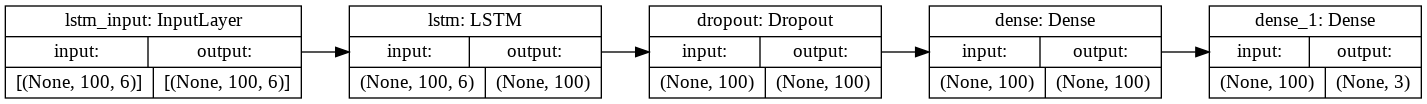

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1:] # number of columns/variables/features : 2x3 = 6
# n_classes = 6 creo que me equivoqué
n_classes = 3
#input_dim = X_train.shape[2] # number of columns/variables/features : 2x3 = 6
#timesteps= X_train.shape[1]
#n_outputs = np.unique(y_train).shape[0]

#print("input_dim = ", input_dim)
##print("num_classes = ", n_outputs)

### https://www.tensorflow.org/api_docs/python/tf/keras/losses
# loss_function = 'sparse_categorical_crossentropy'

### https://www.tensorflow.org/api_docs/python/tf/keras/metrics
# score_function = 'sparse_categorical_accuracy'

### https://www.tensorflow.org/api_docs/python/tf/keras/activations
# activation_function = 'relu'

### https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# optimizer_function = 'adam'

verbose, epochs, batch_size = 1, 15, 64

model = Sequential()
model.add(LSTM(100, input_shape=(input_dim)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
	
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
plot = tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR')
print(model.summary())
plot


In [ ]:
# fit network
#model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
start_time = time.perf_counter()

result = model.fit(X_train, y_train, epochs=epochs, verbose=1, batch_size=batch_size, validation_data=(X_test, y_test))

end_time = time.perf_counter()
run_time = (end_time - start_time)
print( "time = " + str(int(run_time)) + " s = " + str(int(run_time//60)) + " mins" )

Epoch 1/15
3514/3514 [==============================] - 313s 88ms/step - loss: 0.4553 - sparse_categorical_accuracy: 0.8243 - val_loss: 0.2595 - val_sparse_categorical_accuracy: 0.9148
Epoch 2/15
3514/3514 [==============================] - 317s 90ms/step - loss: 0.3557 - sparse_categorical_accuracy: 0.8581 - val_loss: 0.5441 - val_sparse_categorical_accuracy: 0.6985
Epoch 3/15
3514/3514 [==============================] - 315s 90ms/step - loss: 0.4159 - sparse_categorical_accuracy: 0.8284 - val_loss: 0.2843 - val_sparse_categorical_accuracy: 0.8977
Epoch 4/15
3514/3514 [==============================] - 315s 90ms/step - loss: 0.2644 - sparse_categorical_accuracy: 0.9127 - val_loss: 0.2191 - val_sparse_categorical_accuracy: 0.9284
Epoch 5/15
3514/3514 [==============================] - 316s 90ms/step - loss: 0.2361 - sparse_categorical_accuracy: 0.9214 - val_loss: 0.1742 - val_sparse_categorical_accuracy: 0.9399
Epoch 6/15
3514/3514 [==============================] - 316s 90ms/step - lo

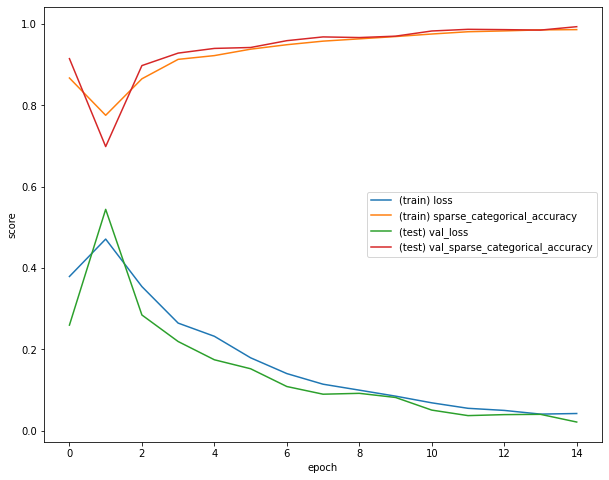

In [ ]:
datafolder = '/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/'
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
for key in result.history :
  #if key == "loss" or key == "val_loss": continue
  label = ("(test) " if key.startswith("val_") else "(train) ") + key
  plt.plot(result.history[key], label=label)
#ax.set(ylim=[-0.1, 1.1])
ax.set(xlabel="epoch", ylabel="score")
ax.legend()
plt.show()
fig.savefig(datafolder + "plot-train_test_loss_metrics_LSTM_1_8people.png")

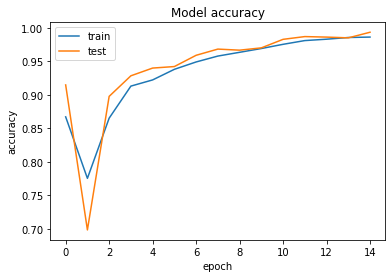

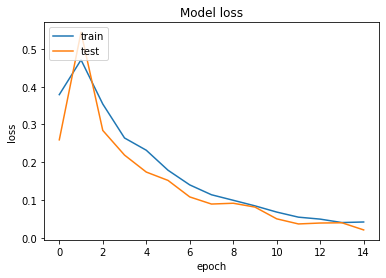

In [ ]:
# summarize history for accuracy
plt.plot(result.history['sparse_categorical_accuracy'])
plt.plot(result.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save and load network

In [ ]:
### Save
datafolder = '/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/'
dnn_filename = datafolder + "trained_network_p1_RNN_8people.h5"
model.save(dnn_filename)
print("Model saved to: " + dnn_filename)

### Load
model = tf.keras.models.load_model(datafolder + "trained_network_p1_RNN_8people.h5")
model.summary()

Model saved to: /content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/trained_network_p1_RNN_8people.h5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               42800     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 53,203
Trainable params: 53,203
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##Loading csv files
path = r'/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/all_IMUsamples_2people.csv'

df= pd.read_csv(path, skiprows=1, usecols=[0,1,2,3,4,5,6,7], names=['Trial_number','x1', 'y1', 'z1','x2', 'y2', 'z2','label'])
print (df.info)
print(df.shape)

#label outputs (y) Activities
y = pd.read_csv(path, usecols= [7])
print("y = \n",y)
print(y.shape)

#Standarizing
x = []
scaler = StandardScaler()
x = scaler.fit_transform(df)
x = pd.DataFrame(data = df, columns = ['x1','y1','z1','x2','y2','z2'])
print("x = \n",x)
print(x.shape)

#Verifying data shape
x.shape, y.shape   

#Counting number of samples per activity
y['label'].value_counts()

### Windowing
print(df.head())
print(df.shape)
#df.loc[3,"y2"]
df.loc[2:4]

dataset_size = df.shape[0] ### how many rows
window_size = 100 ### how many time steps we want to process simultaneously

X_test = np.array([ x.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
print(X_test[0:5])
print("shape(X_test) = ", X_test.shape)


y_test= np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
print(y_test[0:5])
print("shape(y_test) = ", y_test.shape)

<bound method DataFrame.info of        Trial_number     x1     y1     z1     x2     y2     z2  label
0                17  0.039  0.008 -0.016 -0.070  0.007 -0.009      0
1                17  0.038  0.010 -0.013 -0.073  0.007 -0.007      0
2                17  0.034  0.008 -0.012 -0.073  0.004 -0.009      0
3                17  0.025  0.008 -0.010 -0.073  0.008 -0.008      0
4                17  0.026  0.010 -0.013 -0.073  0.007 -0.009      0
...             ...    ...    ...    ...    ...    ...    ...    ...
99103            20 -0.090 -0.068 -0.091 -0.088  0.036 -0.048      2
99104            20 -0.085 -0.069 -0.079 -0.088  0.036 -0.048      2
99105            20 -0.078 -0.073 -0.064 -0.088  0.036 -0.048      2
99106            20 -0.080 -0.079 -0.059 -0.088  0.036 -0.048      2
99107            20 -0.092 -0.083 -0.069 -0.088  0.036 -0.048      2

[99108 rows x 8 columns]>
(99108, 8)
y = 
        label
0          0
1          0
2          0
3          0
4          0
...      ...
99103

In [ ]:
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K

print(tf.version.VERSION)
print(tf.keras.__version__)

2.7.0
2.7.0


In [ ]:
import tensorflow as tf

if tf.__version__ != '2.6.0-rc0':
  !pip uninstall -y tensorflow
  !pip install tensorflow-gpu==2.6.0rc0

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Successfully uninstalled tensorflow-2.7.0
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.6.0rc0 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.6.0, 2.6.1, 2.6.2, 2.7.0rc0, 2.7.0rc1, 2.7.0)
ERROR: No matching distribution found for tensorflow-gpu==2.6.0rc0


In [ ]:
datafolder = '/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/IMU_Trials/'
### Load
model = tf.keras.models.load_model(datafolder + "trained_network_p1_RNN_8people.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 53,203
Trainable params: 53,203
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#X_test = X_test.reshape((X_test.shape[0], 1, 10, 6))
start_time = time.perf_counter()
y_pred = model.predict(X_test)
end_time = time.perf_counter()

test_size = X_test.shape[0]
total_predict_time = (end_time - start_time) # in seconds
prediction_time_per_sample = round( ( (end_time - start_time)*1000)/test_size ,5) # in milliseconds
print(prediction_time_per_sample)

ValueError: ignored

In [ ]:
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred[0:20])
loss_function = 'sparse_categorical_crossentropy'
score_function = 'sparse_categorical_accuracy'
scores = model.evaluate(X_test, y_test)
print(loss_function," = ",scores[0])
print(score_function," = ",scores[1])

(76034, 3)
[[9.9999940e-01 4.8057927e-07 1.5383750e-07]
 [5.1590252e-01 2.3162735e-01 2.5247014e-01]
 [1.0000000e+00 8.3271258e-15 7.5777710e-15]
 [2.9148729e-11 8.2437928e-08 9.9999988e-01]
 [1.8393151e-06 3.3165663e-04 9.9966657e-01]
 [5.4092496e-04 9.9863964e-01 8.1934838e-04]
 [5.3437901e-08 2.2201855e-06 9.9999774e-01]
 [1.6955468e-10 1.0112744e-06 9.9999905e-01]
 [1.0000000e+00 2.4567579e-10 9.7233862e-12]
 [2.0201989e-07 3.4809784e-06 9.9999630e-01]
 [9.5086292e-14 1.5685883e-08 1.0000000e+00]
 [1.0000000e+00 5.5325098e-12 2.3851645e-12]
 [1.0000000e+00 3.8119513e-10 3.8301749e-12]
 [2.0699372e-07 8.2881466e-05 9.9991691e-01]
 [1.9252226e-07 3.9338324e-06 9.9999583e-01]
 [1.0000000e+00 1.0056101e-11 3.8248823e-12]
 [1.0000000e+00 4.0158037e-12 8.9859365e-13]
 [5.4305119e-12 3.6806973e-08 1.0000000e+00]
 [9.9997497e-01 2.1583137e-05 3.4015277e-06]
 [7.8594443e-05 9.9833006e-01 1.5913463e-03]]
2377/2377 [==============================] - 51s 21ms/step - loss: 0.0137 - sparse_categ

Testing Accuracy: sparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_cat

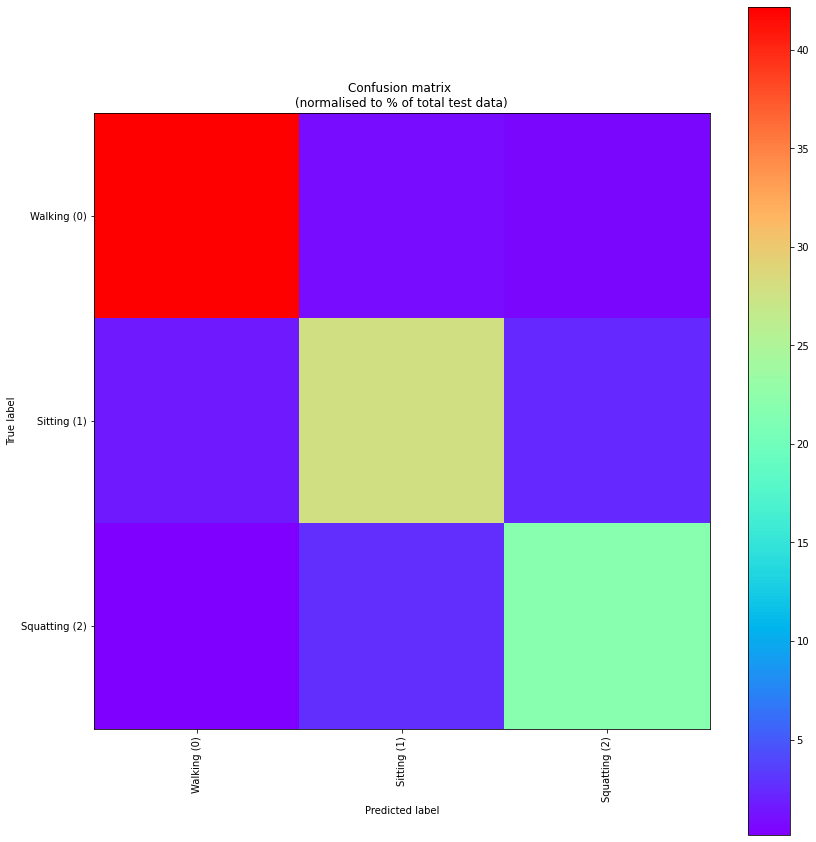

In [ ]:
# Results
import mlxtend

from sklearn import metrics 
predictions = y_pred.argmax(1)

print("Testing Accuracy: {}%".format(100*score_function))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results:
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(normalised_confusion_matrix,interpolation='nearest', cmap=plt.cm.rainbow)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
LABELS = ['Walking (0)', 'Sitting (1)', 'Squatting (2)']
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

max_test = np.argmax(y_test, axis=1) 
max_predictions = np.argmax(y_pred, axis = 1) 
confusion_matrix = confusion_matrix(max_test, max_predictions)
LABELS = ['Walking (0)', 'Sitting (1)', 'Squatting (2)']

plt.figure(figsize=(16,14)) 
sns.heatmap(confusion_matrix, xticklabels = LABELS, yticklabels = LABELS, annot =True, fmt = "d") 
plt.title("Confusion Matrix") 
plt.xlabel('Predicted_label') 
plt.ylabel('True Label') 
plt.show() 

In [ ]:
# Confusion matrix
# !pip3 install mlxtend
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np

max_test = np.argmax(y_test, axis= -1) 
max_predictions = np.argmax(y_pred, axis = -1) 
mat = confusion_matrix(max_test, max_predictions)

# plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))
plot_confusion_matrix(conf_mat=mat,  show_normed=True, figsize=(7,7))

In [ ]:
import numpy as np

confusion_matrix =np.asarray([[41758,  820,  572],
                              [ 1472, 27545, 2370],
                              [ 167, 2652, 21652]])
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP=FP.sum()
FN = FN.sum()
TP = TP.sum()
TN = TN.sum()
print(FP)
print(FN)
print(TP)
print(TN)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(PPV)

8053
8053
90955
189963
0.918663138332256
0.9593315691661279
0.918663138332256
